<a href="https://colab.research.google.com/github/Jason-Gitau/Neural-Networks/blob/main/version1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install tensorflow

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [4]:
# we want to load the mnist datasets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [5]:
# we want to preprocess the data
x_train = x_train.reshape(-1, 784).astype('float32') / 255.0
x_test = x_test.reshape(-1, 784).astype('float32') / 255.0


In [6]:

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [7]:
# we want to now build the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),  # Input layer + first hidden layer
    Dense(64, activation='relu'),                       # Second hidden layer
    Dense(10, activation='softmax')                    # Output layer (10 classes)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
# we want to compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
# we want to train the model
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.8708 - loss: 0.4395 - val_accuracy: 0.9670 - val_loss: 0.1085
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9673 - loss: 0.1067 - val_accuracy: 0.9720 - val_loss: 0.0877
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9779 - loss: 0.0694 - val_accuracy: 0.9739 - val_loss: 0.0867
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9838 - loss: 0.0498 - val_accuracy: 0.9728 - val_loss: 0.0848
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9879 - loss: 0.0381 - val_accuracy: 0.9765 - val_loss: 0.0747


In [10]:
# Use the trained model to make predictions on the test set
predictions = model.predict(x_test)

# Display the predictions for the first 5 test samples
for i in range(5):
    print(f"Predicted probabilities for sample {i}: {predictions[i]}")
    print(f"Most likely class: {predictions[i].argmax()}")  # Class with the highest probability
    print(f"True label: {y_test[i].argmax()}\n")  # True label (one-hot encoded)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Predicted probabilities for sample 0: [2.2861029e-08 2.9384910e-07 1.0053957e-06 4.2849289e-05 2.3939123e-10
 3.0372760e-07 3.0695279e-13 9.9994451e-01 2.8304478e-07 1.0683257e-05]
Most likely class: 7
True label: 7

Predicted probabilities for sample 1: [3.8469668e-07 8.3834268e-05 9.9991173e-01 3.7424466e-06 1.8118638e-15
 1.5088827e-10 1.4260035e-10 3.3358762e-09 1.8810154e-07 1.9563344e-13]
Most likely class: 2
True label: 2

Predicted probabilities for sample 2: [1.5893667e-09 9.9998420e-01 3.5597262e-07 3.2941291e-08 7.5866728e-06
 3.0122838e-08 2.1263799e-07 7.2866515e-06 3.1483063e-07 4.0273904e-09]
Most likely class: 1
True label: 1

Predicted probabilities for sample 3: [9.99948442e-01 2.86840973e-09 1.13138658e-05 1.70766246e-08
 1.74838206e-08 8.10711498e-09 6.41115889e-07 1.22690735e-05
 5.57494459e-08 2.72635680e-05]
Most likely class: 0
True label: 0

Predicted probabilities for sample 4: [2.2122038e-06 1.6880394e-07 3.6964278e-07

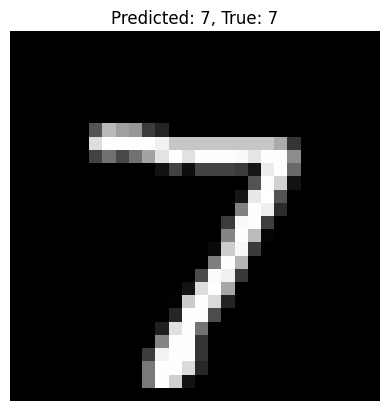

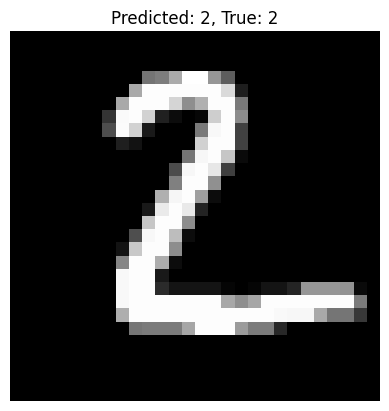

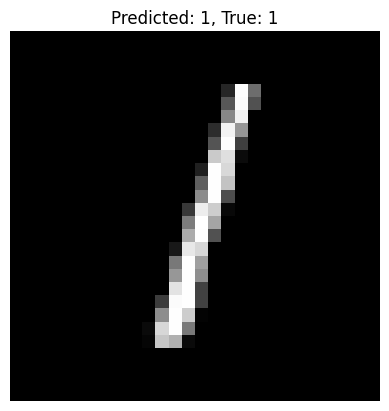

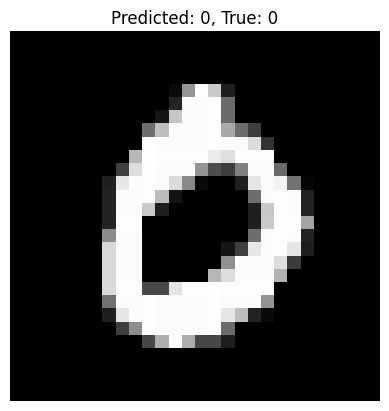

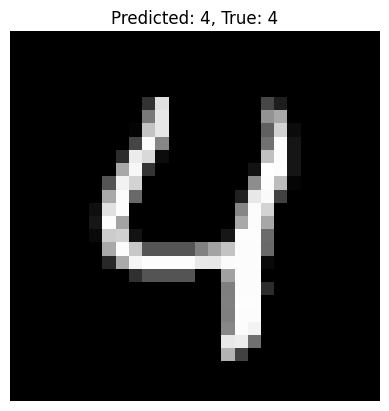

In [11]:
# here we are testing the model with images from the mnist testing part of the datasets, and from the observation, it seems to recognize the really well
import matplotlib.pyplot as plt

# Function to plot images with predictions
def plot_sample(index):
    plt.imshow(x_test[index].reshape(28, 28), cmap='gray')  # Reshape back to 28x28 for visualization
    plt.title(f"Predicted: {predictions[index].argmax()}, True: {y_test[index].argmax()}")
    plt.axis('off')
    plt.show()

# Plot the first 5 test samples
for i in range(5):
    plot_sample(i)

In [12]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9719 - loss: 0.0910
Test Loss: 0.07469858229160309
Test Accuracy: 0.9764999747276306


In [14]:
# here we are just trying to predict an image from an external dataset(my self drawn image)
from PIL import Image
import numpy as np

# Load and preprocess the custom image
def preprocess_image(image_path):
    img = Image.open(image_path).convert('L')  # Convert to grayscale
    img = img.resize((28, 28))                # Resize to 28x28 pixels
    img = np.array(img)                      # Convert to NumPy array
    img = img.reshape(1, 784).astype('float32') / 255.0  # Flatten and normalize
    return img

# Preprocess the custom image
custom_image = preprocess_image('/content/digi1.jpg')

# Make a prediction
custom_prediction = model.predict(custom_image)
print(f"Predicted class: {custom_prediction.argmax()}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Predicted class: 3


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Predicted class: 3


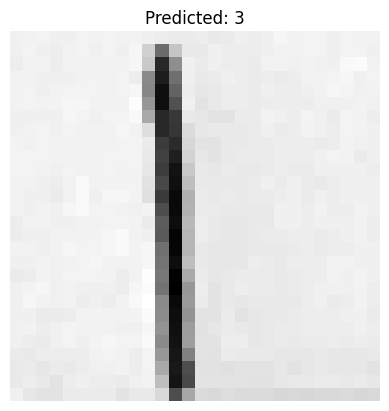

In [15]:
# here we are trying to predict an image from an external dataset(self drawn picture) , then plot it(the actuall image) vs what it predicted
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess the custom image
def preprocess_image(image_path):
    img = Image.open(image_path).convert('L')  # Convert to grayscale
    img = img.resize((28, 28))                # Resize to 28x28 pixels
    img = np.array(img)                      # Convert to NumPy array
    img = img.reshape(1, 784).astype('float32') / 255.0  # Flatten and normalize
    return img

# Define a function to plot a single image with its prediction
def plot_custom_image_prediction(image_data, prediction):
    # Reshape the flattened image data back to 28x28 for plotting
    image_display = image_data.reshape(28, 28)

    # Get the predicted class
    predicted_class = prediction.argmax()

    plt.imshow(image_display, cmap='gray')
    plt.title(f"Predicted: {predicted_class}")
    plt.axis('off')
    plt.show()

# Preprocess the custom image
custom_image_path = '/content/digi1.jpg'
custom_image_processed = preprocess_image(custom_image_path)

# Make a prediction on the preprocessed custom image
custom_prediction = model.predict(custom_image_processed)

# Print the predicted class
print(f"Predicted class: {custom_prediction.argmax()}")

# Plot the custom image with its prediction
plot_custom_image_prediction(custom_image_processed, custom_prediction)

In [16]:
# now we want to evaluate the model vs the digits ive drawn myself
from PIL import Image
import numpy as np
from sklearn.metrics import accuracy_score

# Function to preprocess a custom image
def preprocess_image(image_path):
    img = Image.open(image_path).convert('L')  # Convert to grayscale
    img = img.resize((28, 28))                # Resize to 28x28 pixels
    img = np.array(img)                      # Convert to NumPy array
    img = img.reshape(1, 784).astype('float32') / 255.0  # Flatten and normalize
    return img

# Load and preprocess custom images
custom_images = ['/content/digi2.jpg','/content/digi3.jpg','/content/digit 9.jpg']
true_labels = [2,3,9]  # Add the true labels for your custom images (e.g., [3, 7, 2])

for i, image_path in enumerate(['/content/digi2.jpg', '/content/digi3.jpg', '/content/digit 9.jpg']):
    custom_images.append(preprocess_image(image_path))
    true_labels.append(i)  # Replace with actual labels

custom_images = np.vstack(custom_images)  # Stack all images into a single array

# Make predictions
custom_predictions = model.predict(custom_images)
custom_predicted_classes = np.argmax(custom_predictions, axis=1)

# Calculate accuracy
accuracy = accuracy_score(true_labels, custom_predicted_classes)
print(f"Accuracy on custom images: {accuracy * 100:.2f}%")

# Print predictions
for i in range(len(custom_images)):
    print(f"Image {i}: Predicted = {custom_predicted_classes[i]}, True = {true_labels[i]}")

ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 1 and the array at index 3 has size 784

In [18]:
# now we want to evaluate the model vs the digits ive drawn myself
from PIL import Image
import numpy as np
from sklearn.metrics import accuracy_score

# Function to preprocess a custom image
def preprocess_image(image_path):
    img = Image.open(image_path).convert('L')  # Convert to grayscale
    img = img.resize((28, 28))                # Resize to 28x28 pixels
    img = np.array(img)                      # Convert to NumPy array
    img = img.reshape(1, 784).astype('float32') / 255.0  # Flatten and normalize
    img = (img > 128).astype('float32')  # Convert to binary (black/white)
    img = 255 - img  # Invert pixel values
    return img

# List of image paths and their corresponding true labels
custom_image_paths = ['/content/digi2.jpg','/content/digi3.jpg','/content/digit 9.jpg']
true_labels = [2,3,9]  # Add the true labels for your custom images (e.g., [3, 7, 2])

# Load and preprocess custom images into a list of arrays
processed_custom_images = []
for image_path in custom_image_paths:
    processed_custom_images.append(preprocess_image(image_path))

# Stack all preprocessed images into a single array
custom_images_array = np.vstack(processed_custom_images)

# Make predictions
custom_predictions = model.predict(custom_images_array)
custom_predicted_classes = np.argmax(custom_predictions, axis=1)

# Calculate accuracy
accuracy = accuracy_score(true_labels, custom_predicted_classes)
print(f"Accuracy on custom images: {accuracy * 100:.2f}%")

# Print predictions
for i in range(len(custom_image_paths)):
    print(f"Image {custom_image_paths[i]}: Predicted = {custom_predicted_classes[i]}, True = {true_labels[i]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Accuracy on custom images: 33.33%
Image /content/digi2.jpg: Predicted = 3, True = 2
Image /content/digi3.jpg: Predicted = 3, True = 3
Image /content/digit 9.jpg: Predicted = 3, True = 9
